In [1]:
from astropy.coordinates import SkyCoord, EarthLocation
from Helper_funcs import *
from Scheduler import *
import astropy.coordinates as coord
import astropy.units as u
from tabulate import tabulate
from astropy.time import Time
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

wind10toast not installed


In [2]:
connect = sqlite3.connect('Database.db')
add_randome_data(10)
cont = sqlite_retrieve_table(connect, 'Schedule')

INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M1', 'True', 'Staff', '7', '32', '14-09-2020', '16-09-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M2', 'False', 'Staff', '61', '27', '05-12-2020', '24-10-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M3', 'True', 'Moderator', '13', '37', '14-12-2020', '28-07-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M4', 'True', 'Student (Thesis)', '20', '22', '25-05-2020', '18-08-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M5', 'True', 'OA', '25', '12', '01-02-2021', '

In [3]:
print('({:}, {:}, {:}, {:}, {:}, {:}, {:}, {:})'.format(*[key for key in cont[0]]))
print('| {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} |'.format(*[key for key in cont[0]]))
print('-'*185)
for i in range(len(cont)):
    print('| {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} |'.format(*[cont[i][key] for key in cont[i]]))

(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority)
| object               | time_sensitive       | Observer_type        | Rarity               | total_length         | Submission_Date      | Completed_by         | priority             |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| M1                   | True                 | Staff                |                    7 |                   32 | 14-09-2020           | 16-09-2021           | None                 |
| M2                   | False                | Staff                |                   61 |                   27 | 05-12-2020           | 24-10-2021           | None                 |
| M3                   | True                 | Moderator            |                   13 |                   37 | 14-12-2020           | 28-07-2021   

In [4]:
#Trigger windows AutoHotkey #FIXME: Check this works
from pynput.keyboard import Controller

keyboard = Controller()
keyboard.press('`') #Starts AutoHotkey Script

objects = daily_Schedule('Database.db', 'Schedule')
for i in range(len(objects)):
    objects[i]['min_cond'] = {}

objects,schedule = night_schedule(objects)

In [5]:
print(tabulate([[objects[i][key] for key in objects[i]] for i in range(len(objects))], headers=[key for key in objects[0]]))

object    time_sensitive    Observer_type       Rarity    total_length  Submission_Date    Completed_by      priority    obs_id  min_cond    Possible
--------  ----------------  ----------------  --------  --------------  -----------------  --------------  ----------  --------  ----------  ----------
M3        True              Moderator               13              37  14-12-2020         28-07-2021            54.1         3  {}          False
M6        False             Moderator               68              67  12-05-2020         18-12-2021            54           6  {}          True
M5        True              OA                      25              12  01-02-2021         16-08-2021            38.3         5  {}          True
M10       False             OA                      58              37  28-02-2021         06-08-2021            38.1        10  {}          True
M4        True              Student (Thesis)        20              22  25-05-2020         18-08-2021            

<Figure size 1200x1200 with 0 Axes>

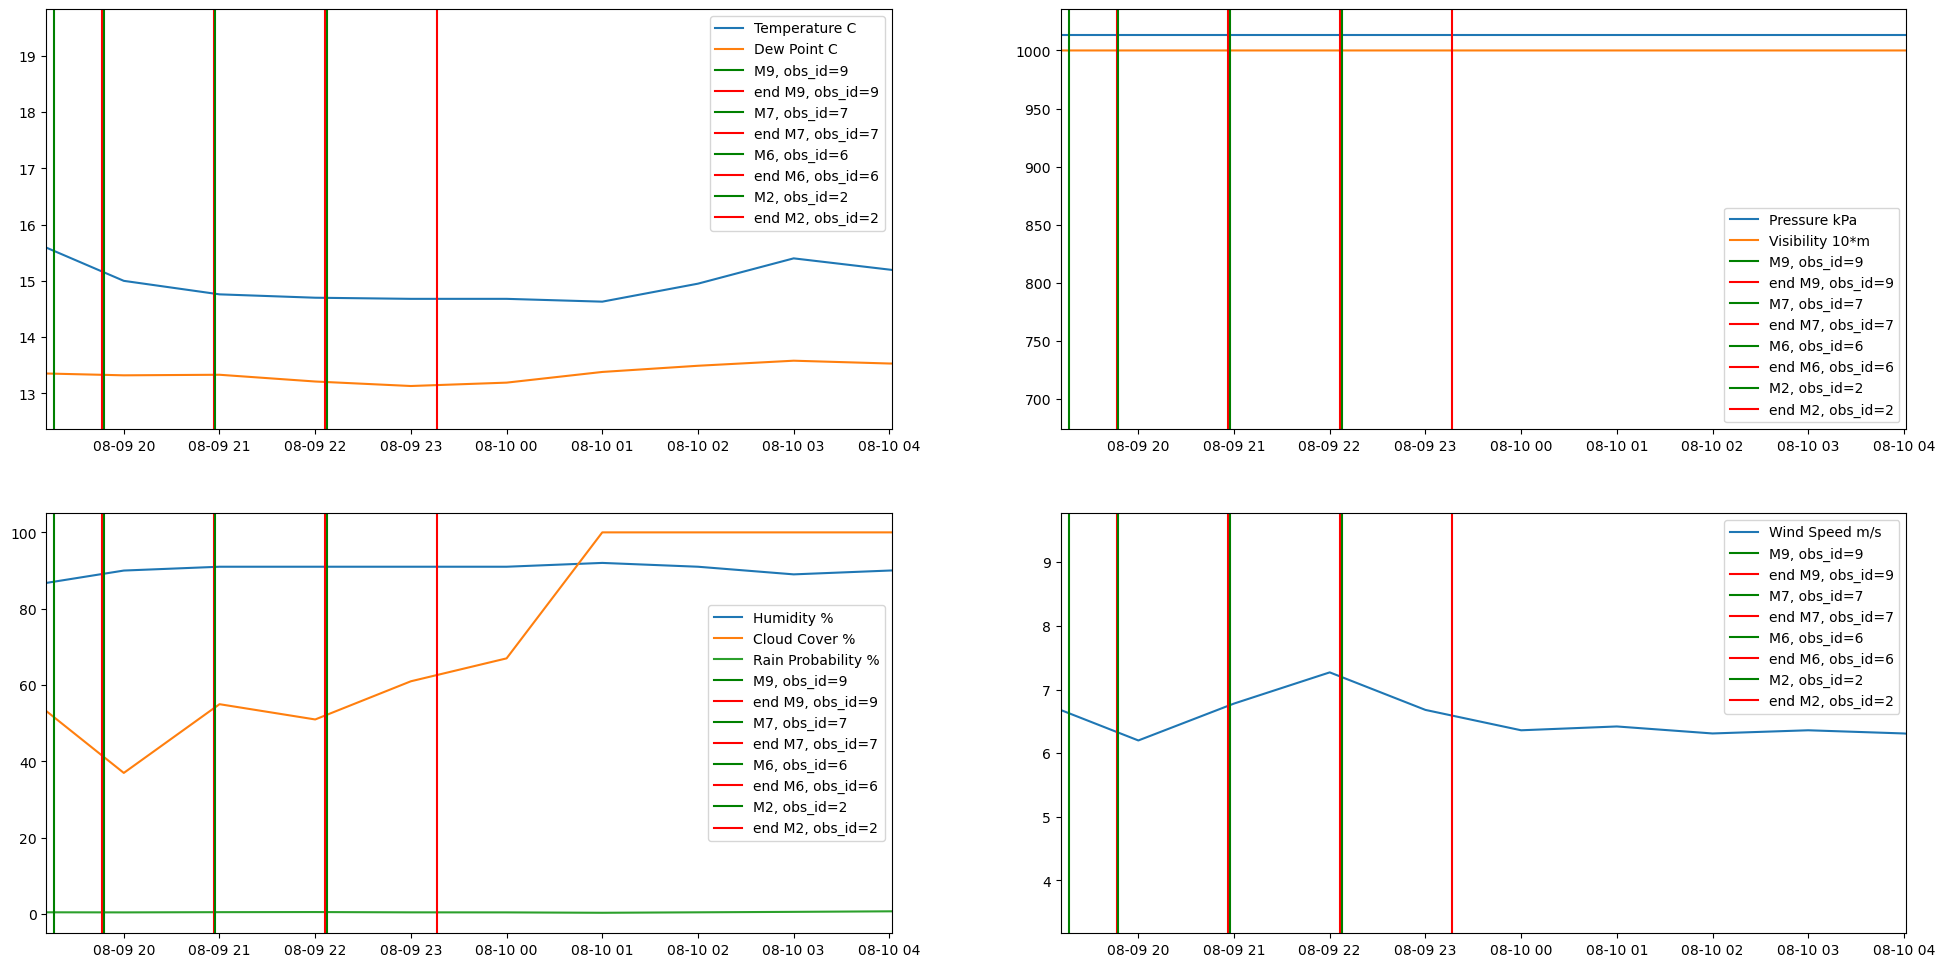

In [5]:
weather = get_predicted_conditions()
make_plot(objects, schedule,weather)

In [14]:
import os

os.chdir("/home/felix/Scripts")
for root, dirs, files in os.walk(".", topdown = True):
   for name in files:
      print(root, ' name ', name)
   for name in dirs:
      print(root, 'dir:', name)


./daily_orig.py
./NeuralNetwork.py
./daily.py
./README.md
./Daily_Analysis_Results.txt
./OptimizeNN_keras.py
./mail.txt
./daily.sh
./NeuralNetwork.ipynb
./NN_creation_optimization.py
./Raw_Data.py
./output.png
./Analysis_hyperparameter.py
./Class_def.py
./OptimizeNN_talos.py
./reddit.ipynb
./deep_val.csv
./Deep_Value.py
./Analysis_hyperparameter.ipynb
./Hyperparameter_optimizaton.ipynb
./mail_formater.py
dir: ./.vscode
dir: ./.ipynb_checkpoints
dir: ./obj
dir: ./stockdata
dir: ./__pycache__
dir: ./hyperparameter_best
dir: ./logs
dir: ./.git
./.vscode/settings.json
./obj/crypto_tickers.pkl
./obj/Price Change.pkl
./obj/stock_tickers.pkl
./obj/Price Change Backup.pkl
./obj/Raw_Data.pkl
./stockdata/AAPL.csv
./__pycache__/OptimizeNN_keras.cpython-38.pyc
./__pycache__/Class_def.cpython-38.pyc
./__pycache__/NeuralNetwork.cpython-38.pyc
./__pycache__/Raw_Data.cpython-38.pyc
./hyperparameter_best/params
./logs/Daily_log_2021-07-23
./logs/Daily_log_2021-07-13
./logs/Daily_log_2021-07-22
./logs/D

In [ ]:
create_ACP_scheudle(objects,schedule)